# plotly 시각화 연습

In [1]:
import plotly

plotly.__version__

'5.24.1'

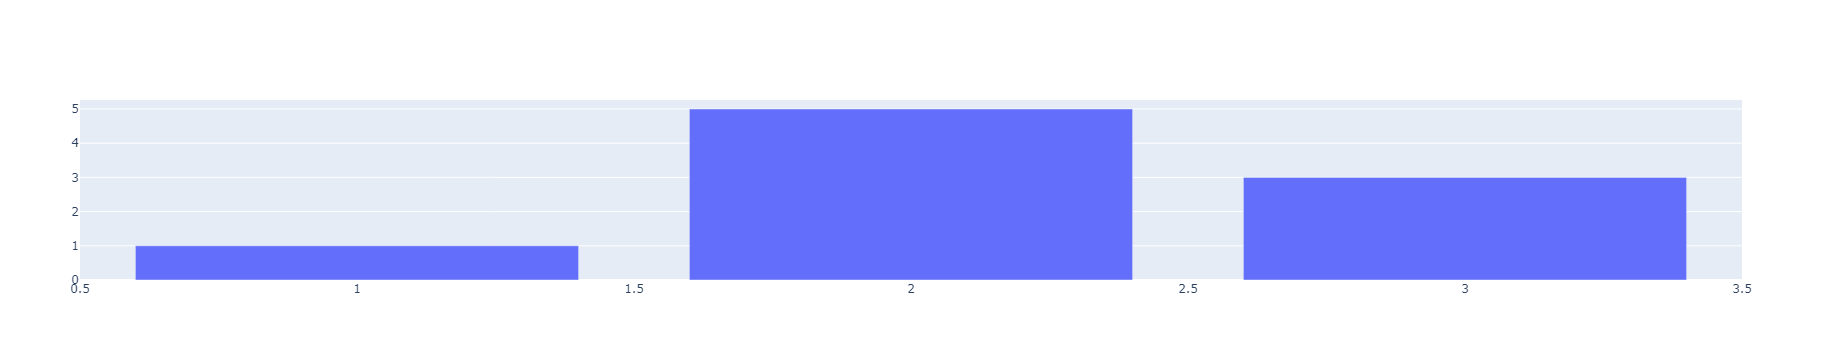

In [6]:
import plotly.graph_objects as go # matplotlib와 개념 유사

fig = go.Figure()
fig.add_trace(go.Bar(x= [1, 2, 3], y = [1, 5, 3]))
fig.show()

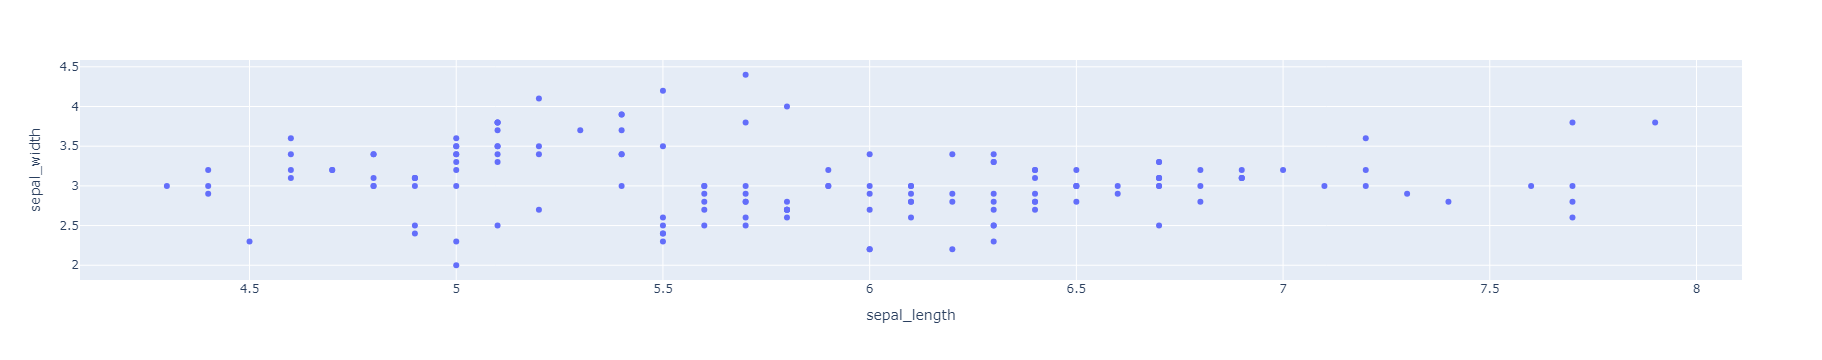

In [4]:
import plotly.express as px # seaborn 개념 유사

iris = px.data.iris()
# iris.head()

fig = px.scatter(iris, x= 'sepal_length', y = 'sepal_width')

fig.show()

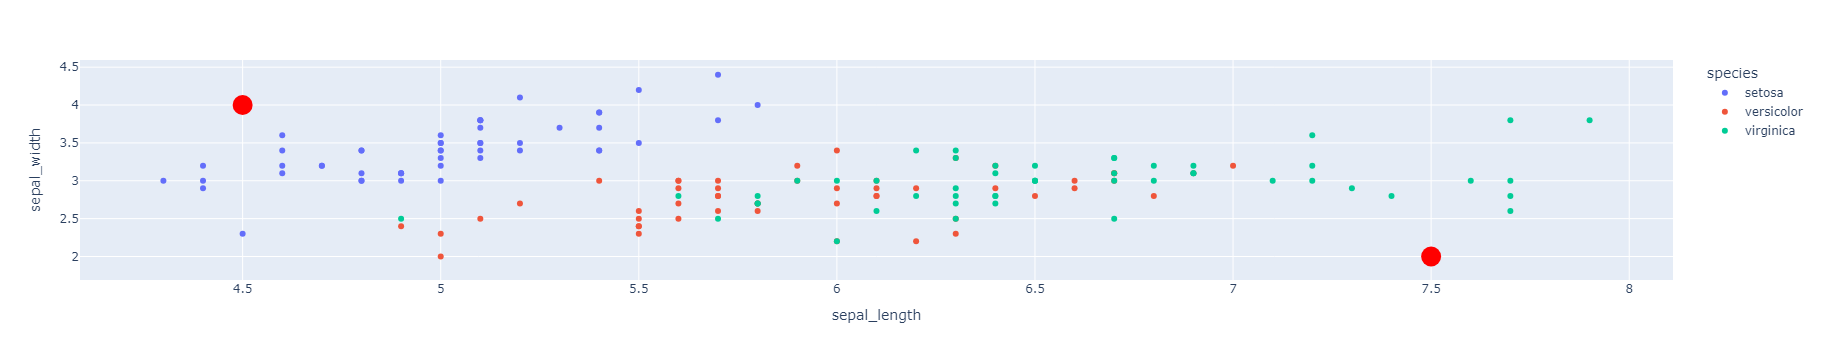

In [11]:
import plotly.express as px # seaborn 개념 유사
import plotly.graph_objects as go # matplotlib와 개념 유사

iris = px.data.iris()
# iris.head()

fig = px.scatter(iris, x= 'sepal_length', y = 'sepal_width', color='species')

fig.add_trace(
    go.Scatter(
        x = [4.5,7.5],
        y= [4, 2],
        #mode = "lines",
        #line = go.scatter.Line(color = "red"),
        mode = "markers",
        marker = dict(size=20, color="red"),
        showlegend=False
    )
)
fig.show()

# plotly 기본문법

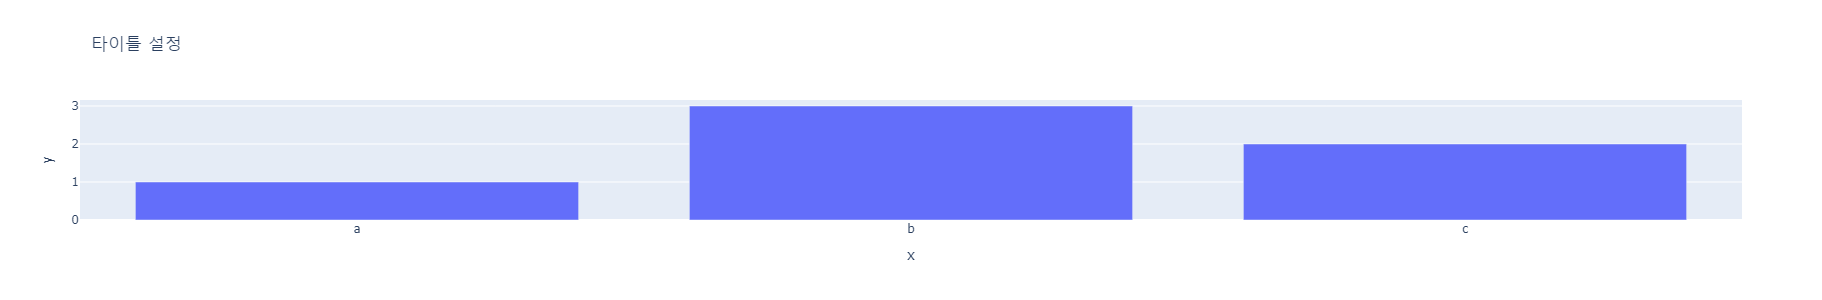

In [36]:
# express 방식
fig = px.bar(x=["a", "b", "c"],
             y=[1, 3, 2],
             width = 600,
             height = 300,
            title = "타이틀 설정")
fig.show()

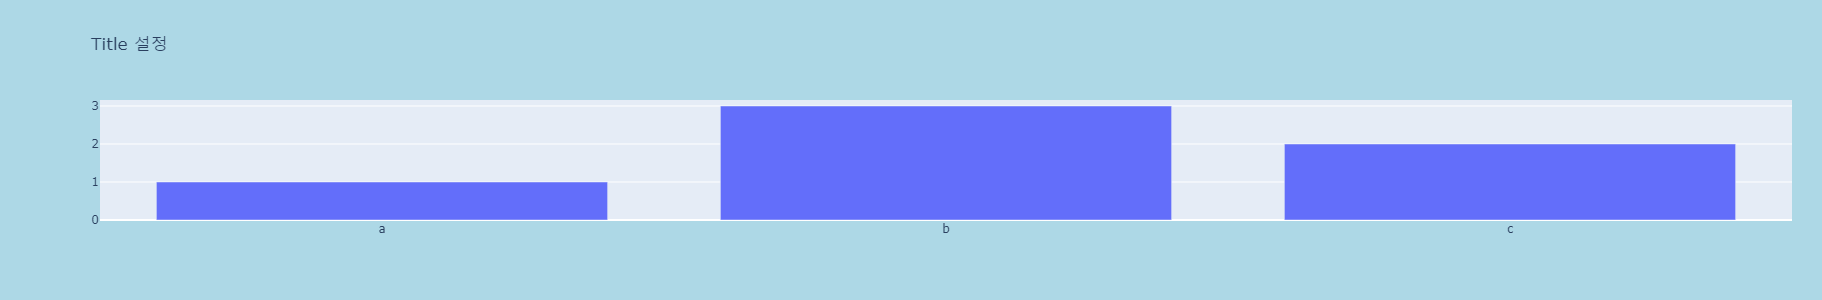

In [41]:
# graph_object 방식
fig = go.Figure(data=[go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])],
                layout = go.Layout(title=go.layout.Title(text = "Title 설정"))
               )

fig.update_layout(
    width=600,
    height=300,
    margin_l=100,
    margin_r=30,

    # 백그라운드 색상 지정
    paper_bgcolor = "lightblue"
)
fig.show()

## 타이틀 설정

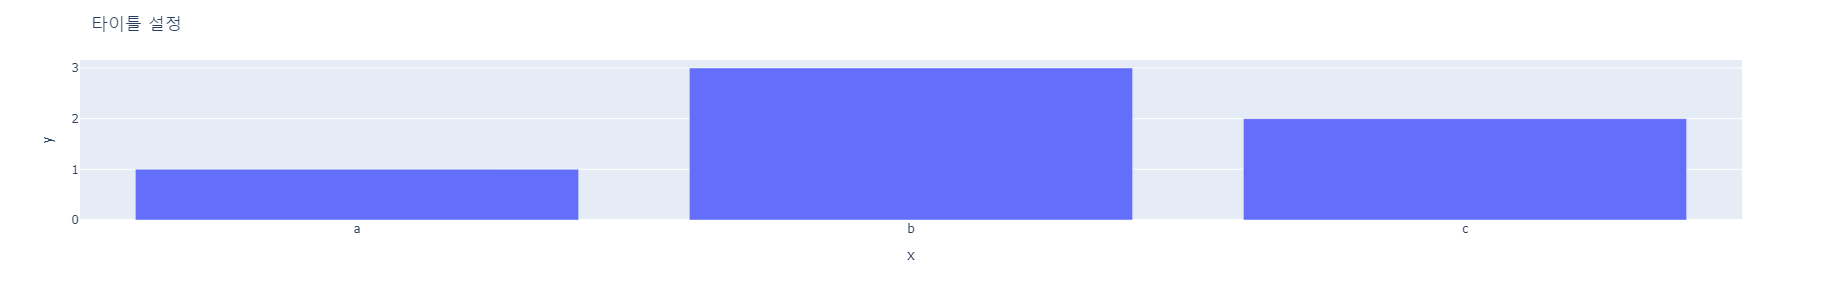

In [51]:
# express
fig = px.bar(x = ["a", "b", "c"], 
             y = [1, 3, 2], width = 600, height = 300)


fig.update_layout(title_text = "타이틀 설정")

fig.show()

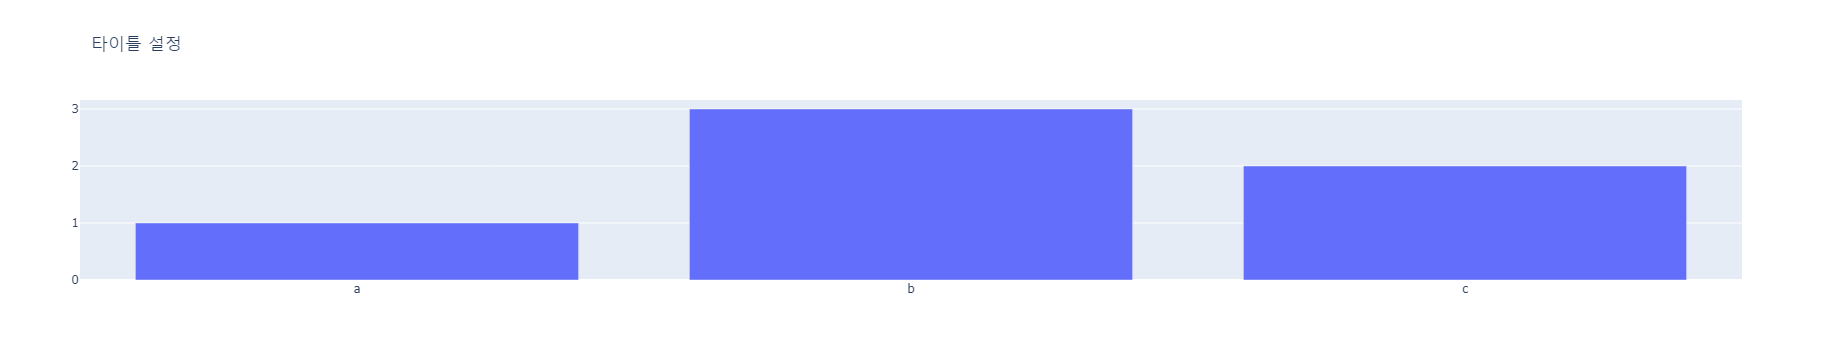

In [52]:
# graph_object 
fig = go.Figure(data=[go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])

fig.update_layout(title_text = "타이틀 설정")

fig.show()

## Hover 설정

In [53]:
df = px.data.gapminder().query("continent=='Oceania'")
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1099,New Zealand,Oceania,1987,74.320,3317166,19007.19129,NZL,554
1100,New Zealand,Oceania,1992,76.330,3437674,18363.32494,NZL,554
1101,New Zealand,Oceania,1997,77.550,3676187,21050.41377,NZL,554
1102,New Zealand,Oceania,2002,79.110,3908037,23189.80135,NZL,554
1103,New Zealand,Oceania,2007,80.204,4115771,25185.00911,NZL,554


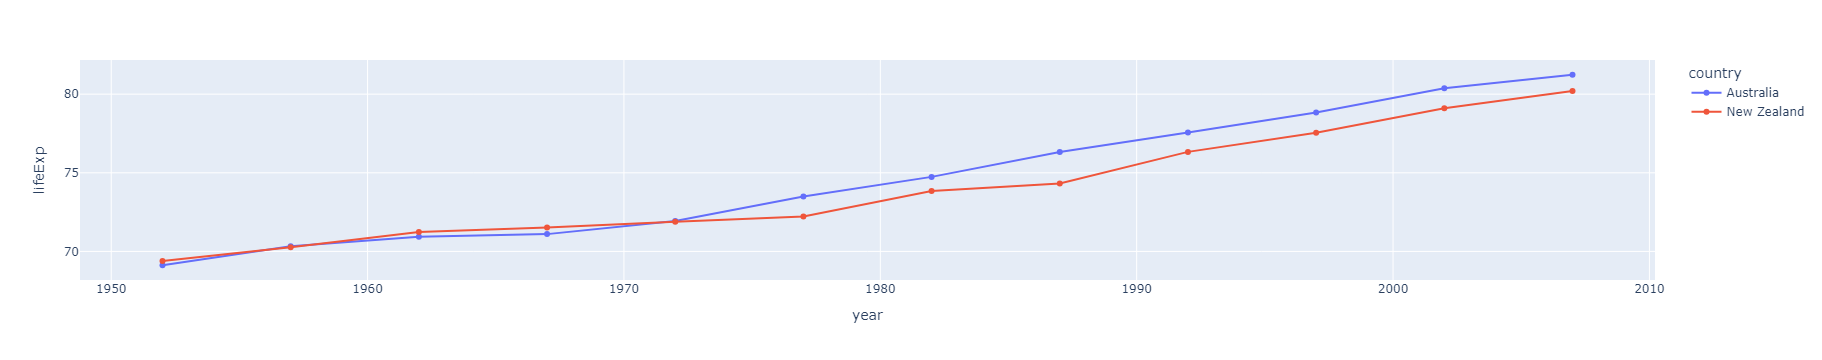

In [63]:
fig = px.line(df, x = 'year', y = 'lifeExp', color = 'country')

# 그래프 내부의 색상, 모양 등등 변경 : update_traces()
fig.update_traces(mode="markers+lines")

# Hover 설정
fig.update_layout(hovermode='y')

fig.show()

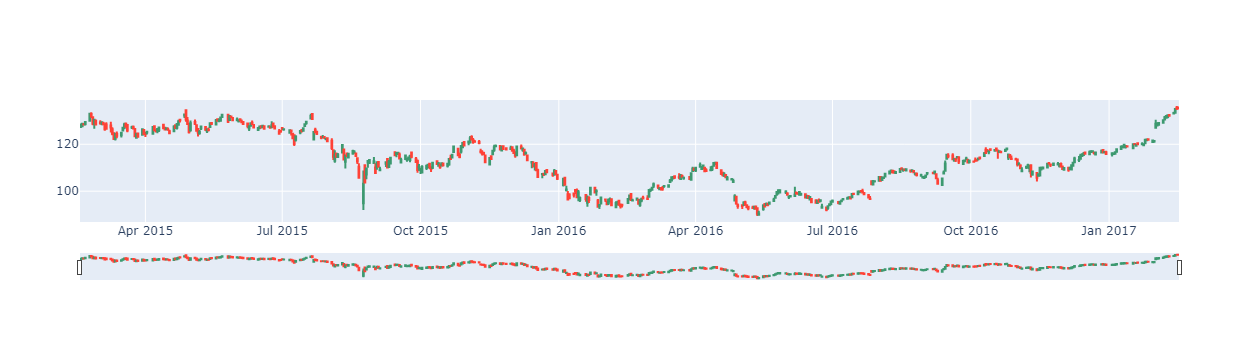

In [73]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

[*********************100%***********************]  1 of 1 completed


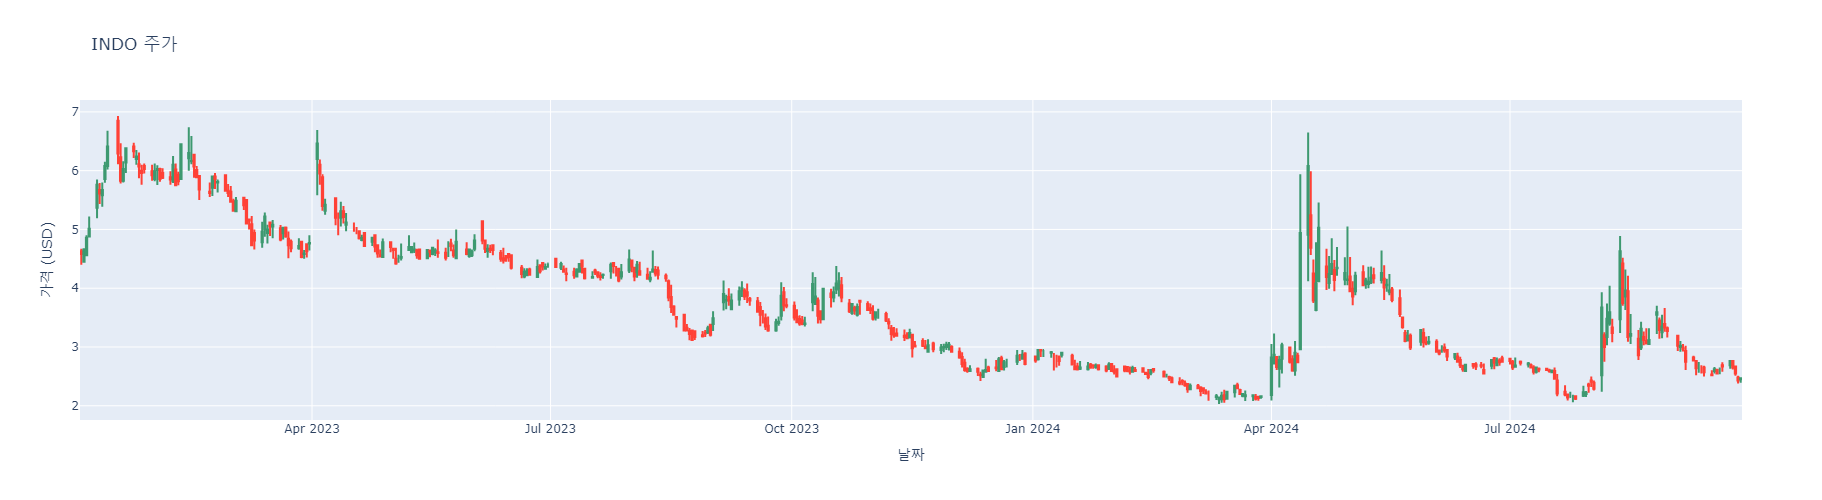

In [81]:
import yfinance as yf
import plotly.graph_objects as go

# 데이터 다운로드
indo = yf.download("INDO", start="2023-01-01", end="2024-09-30")

# 인덱스를 리셋하여 'Date'를 열로 만듦
indo = indo.reset_index()

# 캔들스틱 그래프 생성
fig = go.Figure(data=[go.Candlestick(
    x=indo['Date'],         # 날짜 열
    open=indo['Open'],      # 시가 열
    high=indo['High'],      # 고가 열
    low=indo['Low'],        # 저가 열
    close=indo['Close']     # 종가 열
)])

# 그래프 레이아웃 설정 (제목 및 축 레이블 추가)
fig.update_layout(
    title='INDO 주가',            # 그래프 제목
    xaxis_title='날짜',                    # x축 레이블 설정
    yaxis_title='가격 (USD)',              # y축 레이블 설정
    xaxis_rangeslider_visible=False,       # x축 하단 범위 슬라이더 표시 여부
    width=800,                             # 그래프의 너비
    height=500                             # 그래프의 높이
)

# 그래프 표시
fig.show()

[*********************100%***********************]  1 of 1 completed


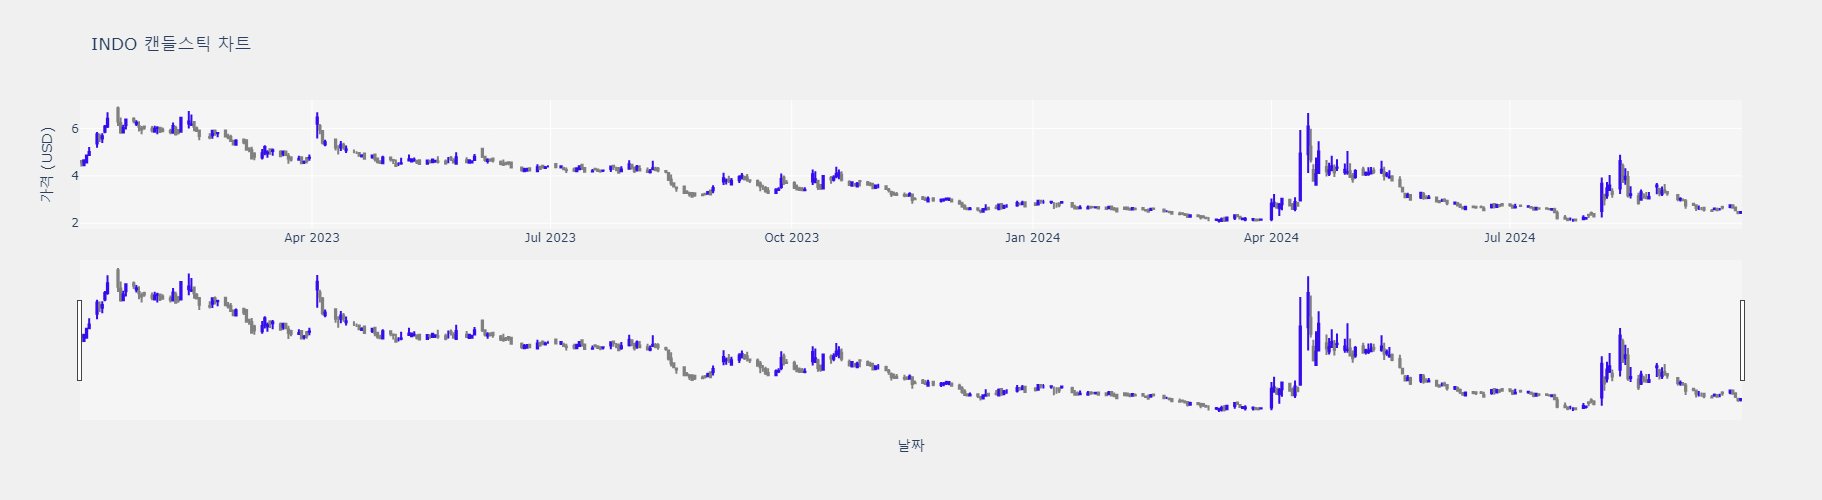

In [110]:
import yfinance as yf
import plotly.graph_objects as go

# 데이터 다운로드
indo = yf.download("INDO", start="2023-01-01", end="2024-09-30")

# 인덱스를 리셋하여 'Date'를 열로 만듦
indo = indo.reset_index()

# 캔들스틱 그래프 생성
fig = go.Figure(data=[go.Candlestick(
    x=indo['Date'],         # 날짜 열
    open=indo['Open'],      # 시가 열
    high=indo['High'],      # 고가 열
    low=indo['Low'],        # 저가 열
    close=indo['Close']     # 종가 열
)])


# 트레이스 업데이트 (스타일 조정)
# 색상 : https://color.adobe.com/ko/create/color-wheel
fig.update_traces(
    increasing_line_color='#350CEB',    # 상승하는 캔들 색상 (녹색)
    decreasing_line_color='gray',      # 하락하는 캔들 색상 (빨간색)
    selector=dict(type='candlestick') # 캔들스틱 타입에만 적용
)

# 그래프 레이아웃 설정 (제목 및 축 레이블 추가)
fig.update_layout(
    title='INDO 캔들스틱 차트',           # 그래프 제목
    xaxis_title='날짜',                   # x축 레이블
    yaxis_title='가격 (USD)',             # y축 레이블
    xaxis_rangeslider_visible=True,      # x축 하단 범위 슬라이더 표시 여부
    width=1300,                            # 그래프의 너비
    height=500,                            # 그래프의 높이
    plot_bgcolor='rgba(245, 245, 245, 1)', # 플롯 영역 배경색 (밝은 회색)
    paper_bgcolor='rgba(240, 240, 240, 1)', # 종이 배경색 (밝은 회색)
    hovermode='x', 
    xaxis_rangeslider_thickness=0.5
)

# 그래프 표시
fig.show()

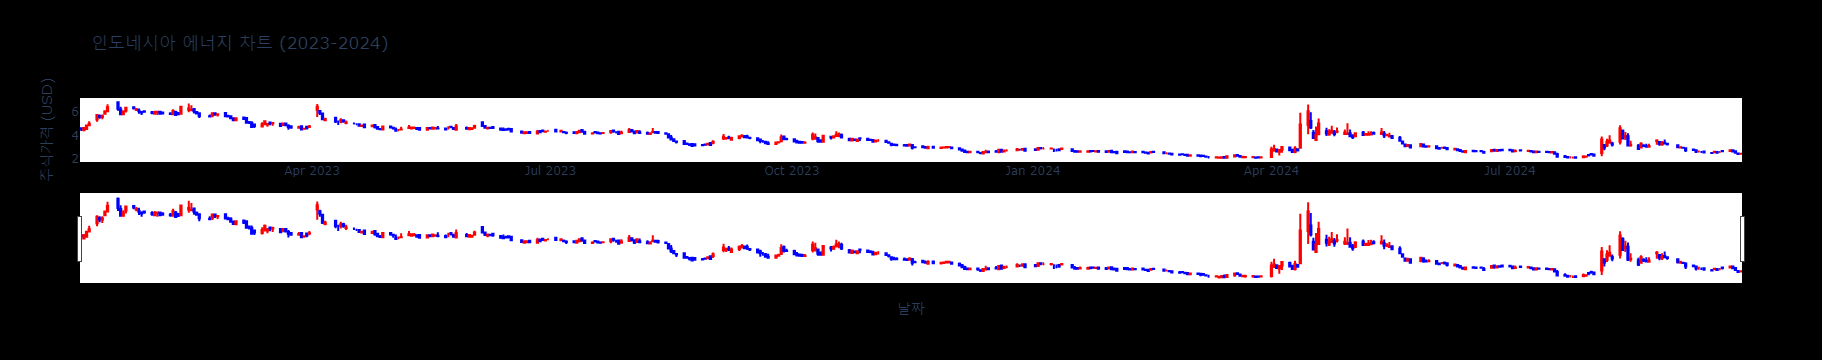

In [104]:
fig = go.Figure(data=[go.Candlestick(x=indo['Date'],
                open=indo['Open'],
                high=indo['High'],
                low=indo['Low'],
                close=indo['Close'])])

# update_layout 
# 차트 제목, 축 레이블 설정
# 
fig.update_layout(
    title = "인도네시아 에너지 차트 (2023-2024)", 
    xaxis_title = "날짜", 
    yaxis_title = "주식가격 (USD)", 
    hovermode='x', 
    xaxis_rangeslider_visible=True, 
    xaxis_rangeslider_thickness=0.5,
    paper_bgcolor = 'black', 
    plot_bgcolor = 'white',
)

# update_traces
# 캔들차트의 색상을 변경, 
fig.update_traces(
    increasing_line_color = "red", 
    decreasing_line_color = "blue", 
)

fig.show()

[*********************100%***********************]  1 of 1 completed


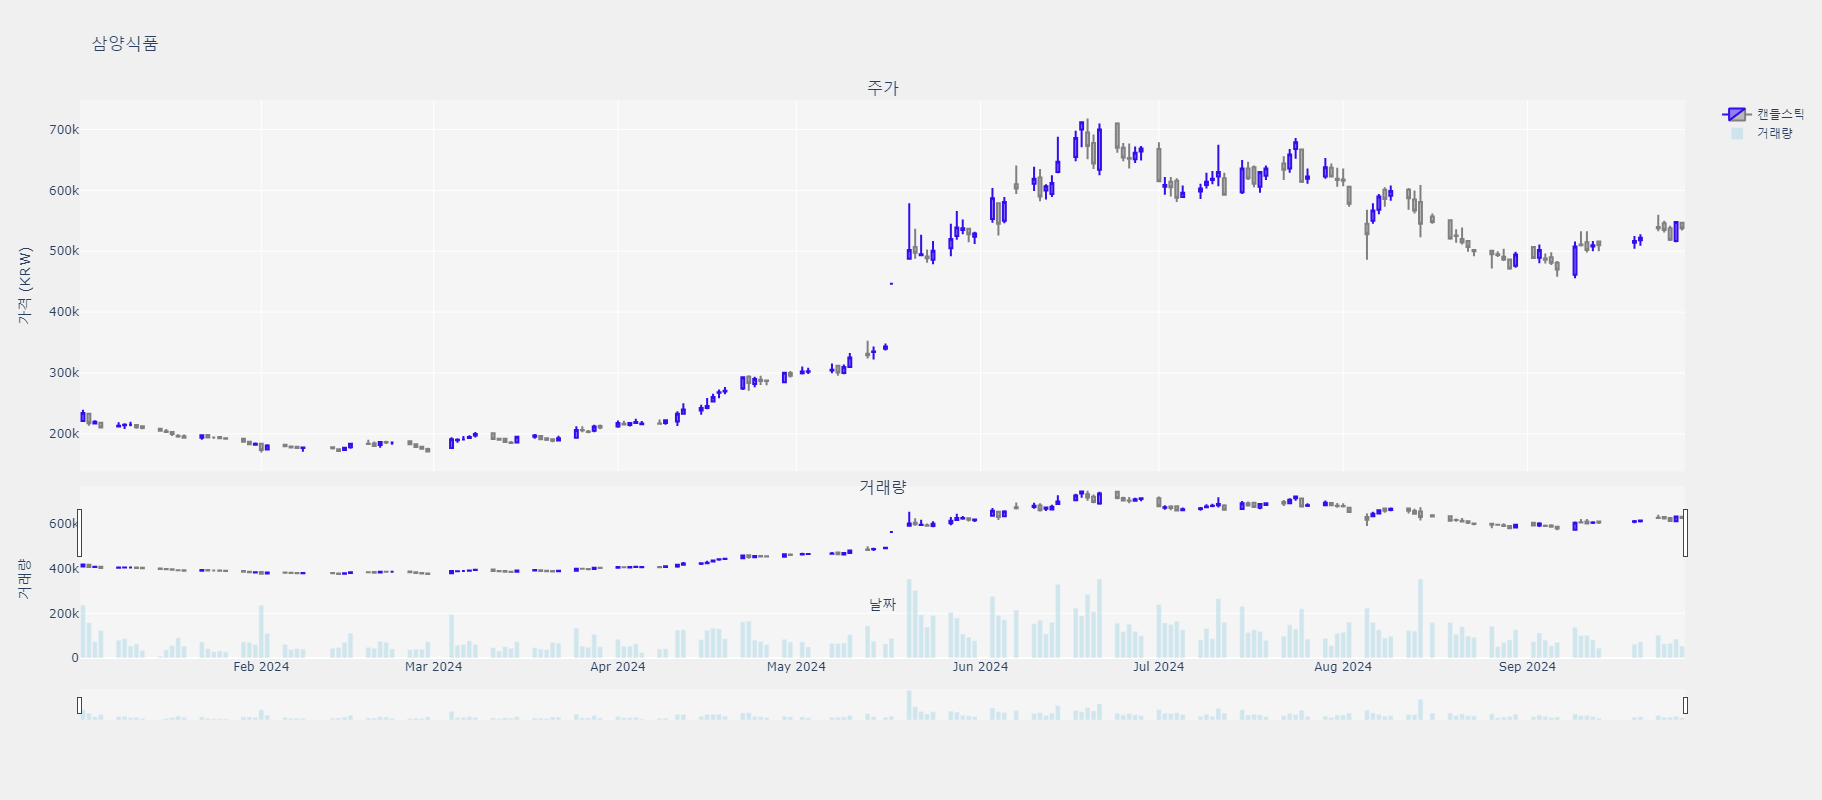

In [122]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 데이터 다운로드
samyang_foods = yf.download("003230.KS", start="2024-01-01", end="2024-09-30")

# 인덱스를 리셋하여 'Date'를 열로 만듦
samyang_foods = samyang_foods.reset_index()

# 서브플롯 생성: 2개의 행을 가지며 y축을 공유하지 않음
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=('주가', '거래량'),
                    row_heights=[0.7, 0.3])

# 캔들스틱 그래프 추가 (첫 번째 서브플롯)
fig.add_trace(go.Candlestick(
    x=samyang_foods['Date'],
    open=samyang_foods['Open'],
    high=samyang_foods['High'],
    low=samyang_foods['Low'],
    close=samyang_foods['Close'],
    name='캔들스틱',
    increasing_line_color='#350CEB',   # 상승 캔들 색상
    decreasing_line_color='gray'       # 하락 캔들 색상
), row=1, col=1)

# 거래량 막대 그래프 추가 (두 번째 서브플롯)
fig.add_trace(go.Bar(
    x=samyang_foods['Date'],
    y=samyang_foods['Volume'],
    name='거래량',
    marker_color='lightblue',
    opacity=0.5
), row=2, col=1)

# 그래프 레이아웃 설정
fig.update_layout(
    title='삼양식품',
    xaxis_title='날짜',
    yaxis_title='가격 (KRW)',
    yaxis2_title='거래량',
    width=1000,
    height=800,
    plot_bgcolor='rgba(245, 245, 245, 1)',  # 플롯 영역 배경색 (밝은 회색)
    paper_bgcolor='rgba(240, 240, 240, 1)', # 종이 배경색 (밝은 회색)
    hovermode='x',                          # x축 기준으로 호버 정보 표시
)

# 범위 슬라이더 설정 (x축 하단)
fig.update_xaxes(rangeslider=dict(visible=True, thickness=0.05), row=2, col=1)

# 그래프 표시
fig.show()

[*********************100%***********************]  1 of 1 completed


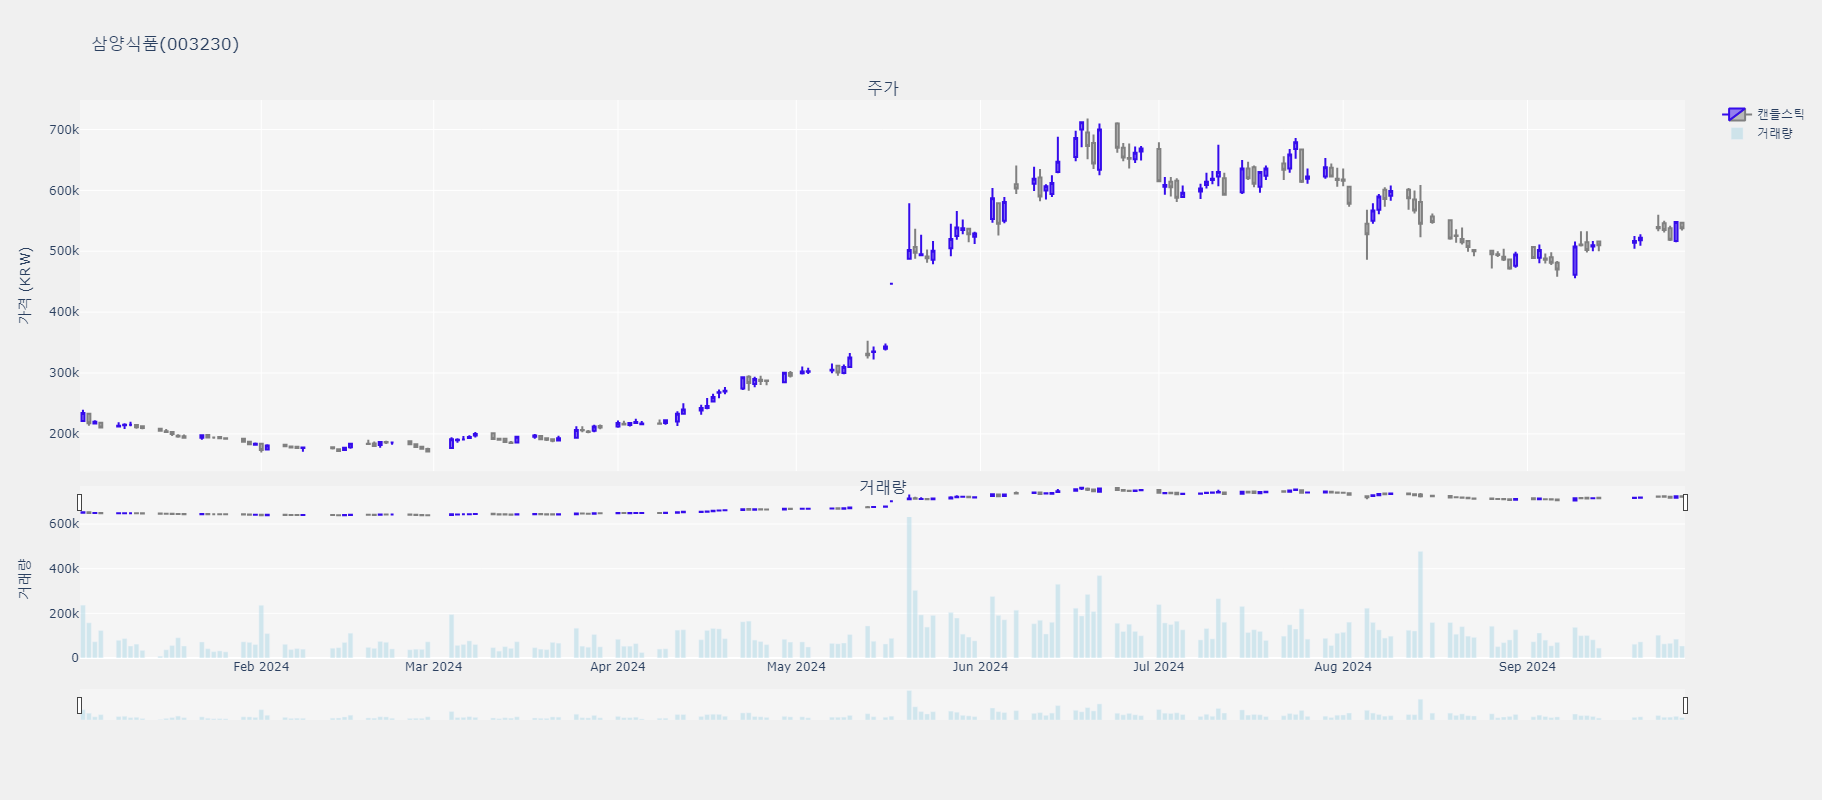

In [126]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 데이터 다운로드
samyang_foods = yf.download("003230.KS", start="2024-01-01", end="2024-09-30")

# 인덱스를 리셋하여 'Date'를 열로 만듦
samyang_foods = samyang_foods.reset_index()

# 서브플롯 생성: 2개의 행을 가지며 y축을 공유하지 않음, x축은 공유
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=('주가', '거래량'),
                    row_heights=[0.7, 0.3])

# 캔들스틱 그래프 추가 (첫 번째 서브플롯)
fig.add_trace(go.Candlestick(
    x=samyang_foods['Date'],
    open=samyang_foods['Open'],
    high=samyang_foods['High'],
    low=samyang_foods['Low'],
    close=samyang_foods['Close'],
    name='캔들스틱',
    increasing_line_color='#350CEB',   # 상승 캔들 색상
    decreasing_line_color='gray'       # 하락 캔들 색상
), row=1, col=1)

# 거래량 막대 그래프 추가 (두 번째 서브플롯)
fig.add_trace(go.Bar(
    x=samyang_foods['Date'],
    y=samyang_foods['Volume'],
    name='거래량',
    marker_color='lightblue',
    opacity=0.5
), row=2, col=1)

# 그래프 레이아웃 설정
fig.update_layout(
    title='삼양식품(003230)',
    width=1000,
    height=800,
    plot_bgcolor='rgba(245, 245, 245, 1)',  # 플롯 영역 배경색 (밝은 회색)
    paper_bgcolor='rgba(240, 240, 240, 1)', # 종이 배경색 (밝은 회색)
    hovermode='x',                          # x축 기준으로 호버 정보 표시
)

# 첫 번째 서브플롯 y축 설정 (가격)
fig.update_yaxes(title_text='가격 (KRW)', row=1, col=1)

# 두 번째 서브플롯 y축 설정 (거래량)
fig.update_yaxes(title_text='거래량', row=2, col=1)

# 범위 슬라이더 설정 (x축 하단)
fig.update_xaxes(rangeslider=dict(visible=True, thickness=0.05))

# 그래프 표시
fig.show()